<a href="https://colab.research.google.com/github/lotrmay/TensorFlow_Learning/blob/master/bc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from __future__ import absolute_import, division, print_function, unicode_literals
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import pickle

import numpy as np #better arrays in python, lepší práce s multidimenzionálními poli
import pandas as pd #data analytics tool, lepší manipulace s daty, dokáže například cut outnout column
import matplotlib.pyplot as plt #vizualizace tabulek a grafů
from IPython.display import clear_output #jen pro tenhle notebook
from six.moves import urllib
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import utils as np_utils
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import keras


(18775, 102)
(17836, 98)
(13377, 98)
(1784, 98)
(2675, 98)
Epoch 1/180
105/105 [==============================] - 1s 3ms/step - loss: 0.7758 - binary_accuracy: 0.4983 - val_loss: 0.7036 - val_binary_accuracy: 0.4621
Epoch 2/180
105/105 [==============================] - 0s 2ms/step - loss: 0.6968 - binary_accuracy: 0.4957 - val_loss: 0.6905 - val_binary_accuracy: 0.5376
Epoch 3/180
105/105 [==============================] - 0s 2ms/step - loss: 0.6904 - binary_accuracy: 0.5388 - val_loss: 0.6920 - val_binary_accuracy: 0.5376
Epoch 4/180
105/105 [==============================] - 0s 2ms/step - loss: 0.6906 - binary_accuracy: 0.5391 - val_loss: 0.6904 - val_binary_accuracy: 0.5376
Epoch 5/180
105/105 [==============================] - 0s 2ms/step - loss: 0.6901 - binary_accuracy: 0.5389 - val_loss: 0.6905 - val_binary_accuracy: 0.5376
Epoch 6/180
105/105 [==============================] - 0s 2ms/step - loss: 0.6902 - binary_accuracy: 0.5388 - val_loss: 0.6903 - val_binary_accuracy: 0.5376

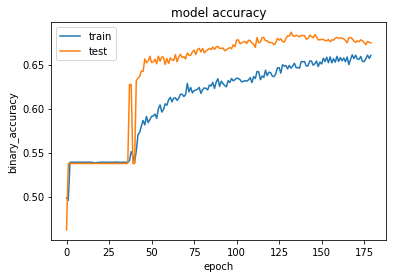

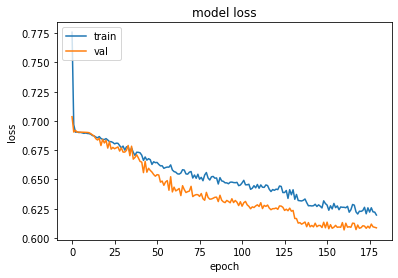

In [35]:
%tensorflow_version 2.x
import tensorflow as tf
from __future__ import absolute_import, division, print_function, unicode_literals
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import pickle

import numpy as np #better arrays in python, lepší práce s multidimenzionálními poli
import pandas as pd #data analytics tool, lepší manipulace s daty, dokáže například cut outnout column
import matplotlib.pyplot as plt #vizualizace tabulek a grafů
from IPython.display import clear_output #jen pro tenhle notebook
from six.moves import urllib
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import utils as np_utils
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import keras


#CSV_COLUMN_NAMES označuje nadpisy sloupců v csv soubour
CSV_COLUMN_NAMES=['Odds_firstTeam','Odds_secondTeam','Rank_firstTeam','Rank_secondTeam','WinRate_firstTeam','WinRate_secondTeam','PistolWinRate_firstTeam','PistolWinRate_secondTeam',
                  'playerAARating','playerAADpr','playerAAKast','playerAAImpact','playerAAAdr','playerAAKpr','playerAAHs','playerAAKD','playerAAGrenadeDmg',
                  'playerABRating','playerABDpr','playerABKast','playerABImpact','playerABAdr','playerABKpr','playerABHs','playerABKD','playerABGrenadeDmg',
                  'playerACRating','playerACDpr','playerACKast','playerACImpact','playerACAdr','playerACKpr','playerACHs','playerACKD','playerACGrenadeDmg',
                  'playerADRating','playerADDpr','playerADKast','playerADImpact','playerADAdr','playerADKpr','playerADHs','playerADKD','playerADGrenadeDmg',
                  'playerAERating','playerAEDpr','playerAEKast','playerAEImpact','playerAEAdr','playerAEKpr','playerAEHs','playerAEKD','playerAEGrenadeDmg',
                  'playerBARating','playerBADpr','playerBAKast','playerBAImpact','playerBAAdr','playerBAKpr','playerBAHs','playerBAKD','playerBAGrenadeDmg',
                  'playerBBRating','playerBBDpr','playerBBKast','playerBBImpact','playerBBAdr','playerBBKpr','playerBBHs','playerBBKD','playerBBGrenadeDmg',
                  'playerBCRating','playerBCDpr','playerBCKast','playerBCImpact','playerBCAdr','playerBCKpr','playerBCHs','playerBCKD','playerBCGrenadeDmg',
                  'playerBDRating','playerBDDpr','playerBDKast','playerBDImpact','playerBDAdr','playerBDKpr','playerBDHs','playerBDKD','playerBDGrenadeDmg',
                  'playerBERating','playerBEDpr','playerBEKast','playerBEImpact','playerBEAdr','playerBEKpr','playerBEHs','playerBEKD','playerBEGrenadeDmg','Match_link','Result','team_one_name','team_two_name']
CSV_COLUMN_NAMES2=['Odds_firstTeam','Odds_secondTeam','Rank_firstTeam','Rank_secondTeam','WinRate_firstTeam','WinRate_secondTeam','PistolWinRate_firstTeam','PistolWinRate_secondTeam',
                  'playerAARating','playerAADpr','playerAAKast','playerAAImpact','playerAAAdr','playerAAKpr','playerAAHs','playerAAKD','playerAAGrenadeDmg',
                  'playerABRating','playerABDpr','playerABKast','playerABImpact','playerABAdr','playerABKpr','playerABHs','playerABKD','playerABGrenadeDmg',
                  'playerACRating','playerACDpr','playerACKast','playerACImpact','playerACAdr','playerACKpr','playerACHs','playerACKD','playerACGrenadeDmg',
                  'playerADRating','playerADDpr','playerADKast','playerADImpact','playerADAdr','playerADKpr','playerADHs','playerADKD','playerADGrenadeDmg',
                  'playerAERating','playerAEDpr','playerAEKast','playerAEImpact','playerAEAdr','playerAEKpr','playerAEHs','playerAEKD','playerAEGrenadeDmg',
                  'playerBARating','playerBADpr','playerBAKast','playerBAImpact','playerBAAdr','playerBAKpr','playerBAHs','playerBAKD','playerBAGrenadeDmg',
                  'playerBBRating','playerBBDpr','playerBBKast','playerBBImpact','playerBBAdr','playerBBKpr','playerBBHs','playerBBKD','playerBBGrenadeDmg',
                  'playerBCRating','playerBCDpr','playerBCKast','playerBCImpact','playerBCAdr','playerBCKpr','playerBCHs','playerBCKD','playerBCGrenadeDmg',
                  'playerBDRating','playerBDDpr','playerBDKast','playerBDImpact','playerBDAdr','playerBDKpr','playerBDHs','playerBDKD','playerBDGrenadeDmg',
                  'playerBERating','playerBEDpr','playerBEKast','playerBEImpact','playerBEAdr','playerBEKpr','playerBEHs','playerBEKD','playerBEGrenadeDmg']



train=pd.read_csv('/content/pokus.csv',sep=";",names=CSV_COLUMN_NAMES,error_bad_lines=False,header=None)#vytvoří dataframe z našeho csv souboru
print(train.shape)#vypíše nám dimenzionalitu našeho dataframu (2, 3) 2 řádky 3 sloupce

#následující 2 řádky nám upraví dva sloupce z textových na číselné formáty (category datatype)
train['team_one_name']=pd.Categorical(train['team_one_name']).codes #sníží využití paměti z 1.2MB na 0.03 MB viz: https://towardsdatascience.com/staying-sane-while-adopting-pandas-categorical-datatypes-78dbd19dcd8a
train['team_two_name']=pd.Categorical(train['team_two_name']).codes

#Odstraním z dataframu následující sloupce (odkaz na zápas a jména týmů), jelikož jsem je využíval pouze při sběru dat
train.pop('Match_link')
train.pop('team_one_name')
train.pop('team_two_name')
#https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
train = train.sample(frac=1).reset_index(drop=True)

'''
train.pop('playerAAGrenadeDmg')
train.pop('playerABGrenadeDmg')
train.pop('playerACGrenadeDmg')
train.pop('playerADGrenadeDmg')
train.pop('playerAEGrenadeDmg')
train.pop('playerBAGrenadeDmg')
train.pop('playerBBGrenadeDmg')
train.pop('playerBCGrenadeDmg')
train.pop('playerBDGrenadeDmg')
train.pop('playerBEGrenadeDmg')

train.pop('playerAAKast')
train.pop('playerABKast')
train.pop('playerACKast')
train.pop('playerADKast')
train.pop('playerAEKast')
train.pop('playerBAKast')
train.pop('playerBBKast')
train.pop('playerBCKast')
train.pop('playerBDKast')
train.pop('playerBEKast')

train.pop('playerAAKD')
train.pop('playerABKD')
train.pop('playerACKD')
train.pop('playerADKD')
train.pop('playerAEKD')
train.pop('playerBAKD')
train.pop('playerBBKD')
train.pop('playerBCKD')
train.pop('playerBDKD')
train.pop('playerBEKD')

train.pop('playerAAAdr')
train.pop('playerABAdr')
train.pop('playerACAdr')
train.pop('playerADAdr')
train.pop('playerAEAdr')
train.pop('playerBAAdr')
train.pop('playerBBAdr')
train.pop('playerBCAdr')
train.pop('playerBDAdr')
train.pop('playerBEAdr')

train.pop('playerAADpr')
train.pop('playerABDpr')
train.pop('playerACDpr')
train.pop('playerADDpr')
train.pop('playerAEDpr')
train.pop('playerBADpr')
train.pop('playerBBDpr')
train.pop('playerBCDpr')
train.pop('playerBDDpr')
train.pop('playerBEDpr')

train.pop('playerAAKpr')
train.pop('playerABKpr')
train.pop('playerACKpr')
train.pop('playerADKpr')
train.pop('playerAEKpr')
train.pop('playerBAKpr')
train.pop('playerBBKpr')
train.pop('playerBCKpr')
train.pop('playerBDKpr')
train.pop('playerBEKpr')

train.pop('playerAAImpact')
train.pop('playerABImpact')
train.pop('playerACImpact')
train.pop('playerADImpact')
train.pop('playerAEImpact')
train.pop('playerBAImpact')
train.pop('playerBBImpact')
train.pop('playerBCImpact')
train.pop('playerBDImpact')
train.pop('playerBEImpact')

train.pop('playerAAHs')
train.pop('playerABHs')
train.pop('playerACHs')
train.pop('playerADHs')
train.pop('playerAEHs')
train.pop('playerBAHs')
train.pop('playerBBHs')
train.pop('playerBCHs')
train.pop('playerBDHs')
train.pop('playerBEHs')

train.pop('playerAARating')
train.pop('playerABRating')
train.pop('playerACRating')
train.pop('playerADRating')
train.pop('playerAERating')
train.pop('playerBARating')
train.pop('playerBBRating')
train.pop('playerBCRating')
train.pop('playerBDRating')
train.pop('playerBERating')
'''
#predictors nám vybere všechny sloupce, které jsou využity pro predikování výsledků neboli target_column
target_column = ['Result'] 

predictionScaler=StandardScaler()
y = train['Result'].values
train.pop('Result')
X = train.values

#predictionScaler.fit(scalerData)

#n = 100 # Max number of neighbours you want to consider
#param_grid = {'n_neighbors': np.arange(n)}
#grid = GridSearchCV(KNeighborsClassifier(), param_grid)
#grid.fit(X,y)
#print(grid.best_params_)


#určíme outliers (odlehlé hodnoty, které by mohly být při tréninku pro model škodlivé)
#zkráceně řečeno zjistíme odlehlou hodnotu tak, že ve svém okolí má oproti jiným hodnotám o dost méně "sousedů"
#5% dat 

lof = LocalOutlierFactor(contamination=0.05,n_neighbors=96)
yhat = lof.fit_predict(X)
mask = yhat != -1
X, y= X[mask, :], y[mask]
print(X.shape)

#rozdělíme náš dataframe na trénovací, testovací a validační dataset
#testovací dataset bude 15% random_state=98
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)#32 #888 887

#validační set bude 15% random_state=75
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1666) # 0.1666 x 0.9 = 0.1 podívat se na cross-validation


print(X_train.shape) 
print(X_test.shape)
print(X_val.shape) #součet odpovídá X.shape

#vytvoříme scaler, který nám data přetransformuje na formát lepší pro model ?
#scalujeme data aby si model nemyslel, že větší číselný řád indikuje větší důležitost atributu
#https://stackoverflow.com/questions/51237635/difference-between-standard-scaler-and-minmaxscaler
#https://datascience.stackexchange.com/questions/43972/when-should-i-use-standardscaler-and-when-minmaxscaler

#nepoužíváme minmaxscaler, protože naše data by měly být "normálně" distribuovány

X_train = pd.DataFrame(X_train, columns=CSV_COLUMN_NAMES2)
X_test=pd.DataFrame(X_test, columns=CSV_COLUMN_NAMES2)
X_val=pd.DataFrame(X_val, columns=CSV_COLUMN_NAMES2)

predictionScaler.fit(X_train)

X_train=predictionScaler.transform(X_train)#fit transform na training data viz:https://stackoverflow.com/questions/49444262/normalize-data-before-or-after-split-of-training-and-testing-data
X_test=predictionScaler.transform(X_test)
X_val=predictionScaler.transform(X_val)

#64 32
#data máme připravena, tak vytvoříme sequential model, jelikož potřebujeme mít více vrstev, ale máme pouze 1 input (zápas) a output 0;1
model = Sequential()
model.add(keras.layers.InputLayer(input_shape=(98)))#https://towardsdatascience.com/17-rules-of-thumb-for-building-a-neural-network-93356f9930af
model.add(Dense(64, activation='relu'))#input layer je už v modelu defaultně
model.add(keras.layers.Dropout(0.5))#50% inputů dropne abz se příliš nespoléhala na vybrané inputy
model.add(Dense(16, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(Dense(4, activation='relu'))
model.add(keras.layers.Dropout(0.5))#jelikož děláme binární klasifikaci, tak aktivační funkce bude sigmoid popř. softmax, zde by mezi těmito dvěmi neměl být výkonově rozdíl viz:https://stats.stackexchange.com/questions/218542/which-activation-function-for-output-layer
model.add(Dense(1, activation='sigmoid'))


#tady jsem skončil s vysvětlováním!!!
#model zkompilujeme s parametry:
#Common values of [momentum] used in practice include .5, .9, and .99.
#optimizer bude ? optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.5)
#loss funkce bude BinaryCrossentropy, jelikož máme binární klasifikátor
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.99), 
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), #https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
              metrics=tf.keras.metrics.BinaryAccuracy(name='binary_accuracy', dtype=None))#metrics=['accuracy'] je to jedno accuracy se vnitřně přetransformuje na binary accuracy, kvůli binary crossentropy loss funkci
#metrics = ("accuracy")
#metrics=tf.keras.metrics.BinaryAccuracy(name='binary_accuracy', dtype=None)
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.BinaryAccuracy(threshold=.7)])
#[tf.keras.metrics.BinaryAccuracy()]
#optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)
#Adagrad(learning_rate=0.01) kolem 100 epochs a 32 batch_size je kolem 0.67

#shuffle=true?
history = model.fit(X_train, y_train, epochs=180,shuffle=True,batch_size=128,validation_data=(X_val, y_val))#validační data pro změny při tréninku sítě
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))#úspěšnost na trénovacím setu   


pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)# zkusit změnit verbose zde a nahoře na 1 a 2 mělo by to zobrazovat více údajů při tréninku
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))#úspěšnost na testovacím setu


plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])

#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('binary_accuracy')#'accuracy'
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
#poznatky-vypadá to, že grenade damage každého hráče je nadbytečná a síť bez této informace vykazuje lepší výsledky!!
#optimální batch_size je 128 zjištěno zkoušením
#zatím nejlepší model měl 64 16 4 





In [12]:
predictionScaler = pickle.load(open("scaler693.pkl", 'rb'))
Xnew=np.array([[1.45,2.55,12,23,0.33,0.63,0.5,0.515,1.09,0.64,0.72,1.12,70.7,0.7,0.41,1.10,3.2,1.05,0.67,0.7,1.03,77.2,0.66,0.51,0.99,5.0,1.04,0.68,0.7,1.07,69.3,0.64,0.62,0.93,3.5,0.97,0.64,0.69,0.81,71.8,0.58,0.54,0.91,6.0,0.82,0.69,0.68,0.64,57.4,0.51,0.57,0.73,2.9,1.18,0.63,0.73,1.14,83.9,0.75,0.48,1.20,8.0,1.15,0.63,0.72,1.15,75.1,0.76,0.27,1.20,1.5,1.07,0.69,0.7,1.09,77.3,0.69,0.57,1.00,4.6,1.02,0.63,0.72,0.91,69.2,0.63,0.52,1.00,4.0,0.92,0.68,0.68,0.86,66.5,0.57,0.53,0.84,6.2],
               [1.5,2.4,11,22,0.5,0.62,0.468,0.537,1.13,0.61,0.68,1.26,71.4,0.7,0.28,1.14,2.1,1.11,0.7,0.67,1.22,85.9,0.72,0.55,1.02,9.3,1.01,0.66,0.72,0.91,70.7,0.6,0.49,0.91,4.8,0.97,0.62,0.7,0.83,64.2,0.61,0.52,0.98,4.2,0.9,0.68,0.67,0.81,62.6,0.59,0.57,0.87,2.7,1.14,0.6,0.72,1.18,73.1,0.73,0.28,1.21,2.0,1.11,0.68,0.7,1.13,80.6,0.73,0.54,1.07,3.9,1.11,0.6,0.72,1.02,76.6,0.67,0.44,1.12,4.7,1.0,0.69,0.7,0.96,72.3,0.62,0.54,0.91,6.9,1.09,0.6425,0.71,1.0724999999999998,75.64999999999999,0.6875,0.45,1.0775000000000001,4.375],
               [1.46,2.6,5,27,0.46,0.71,0.488,0.527,1.13,0.52,0.75,1.03,66.6,0.68,0.26,1.30,3.1,1.1,0.69,0.68,1.18,84.8,0.7,0.63,1.01,4.6,1.02,0.65,0.69,0.98,68.9,0.66,0.53,1.02,2.3,0.91,0.65,0.69,0.79,63.1,0.53,0.55,0.83,4.9,0.9,0.66,0.67,0.8,65.1,0.58,0.56,0.88,3.7,1.17,0.59,0.74,1.13,75.7,0.74,0.31,1.25,3.3,1.17,0.67,0.72,1.2,84.5,0.75,0.6,1.13,5.7,1.14,0.62,0.74,1.1,74.8,0.72,0.58,1.17,2.9,1.11,0.64,0.71,1.1,76.8,0.72,0.55,1.12,3.5,0.91,0.67,0.68,0.88,63.9,0.55,0.5,0.83,6.2],
               [1.75,2.01,14,8,0.58,0.64,0.5,0.5,1.18,0.64,0.71,1.19,85.6,0.74,0.54,1.16,5.4,1.1,0.6,0.74,0.97,75.0,0.71,0.53,1.18,1.7,1.09,0.61,0.76,0.91,73.6,0.67,0.49,1.10,3.1,1.03,0.7,0.71,1.01,73.0,0.66,0.49,0.95,4.4,0.96,0.63,0.68,0.92,61.1,0.61,0.29,0.96,2.4,1.12,0.66,0.68,1.15,82.3,0.73,0.34,1.09,5.0,1.05,0.75,0.6,1.27,85.7,0.72,0.48,0.96,5.7,1.03,0.62,0.71,0.95,70.5,0.61,0.49,0.98,5.2,0.98,0.69,0.7,0.91,69.9,0.69,0.45,1.00,4.2,0.89,0.67,0.7,0.73,61.7,0.54,0.54,0.80,4.5],
               [1.25,3.75,39,114,0.65,0.44,0.517,0.45,1.19,0.65,0.73,1.27,84.9,0.76,0.49,1.17,7.7,1.12,0.59,0.73,1.13,68.6,0.68,0.28,1.16,2.4,1.05,0.63,0.72,0.98,71.5,0.66,0.55,1.04,5.0,1.05,0.62,0.73,0.91,70.6,0.65,0.55,1.05,5.5,1.02,0.66,0.71,0.97,73.8,0.62,0.47,0.95,9.4,1.07,0.65,0.73,0.95,74.7,0.68,0.58,1.05,4.9,1.0,0.67,0.65,1.04,68.9,0.7,0.56,1.04,5.3,0.96,0.65,0.67,0.84,69.1,0.62,0.53,0.94,5.8,0.94,0.7,0.65,0.95,70.8,0.58,0.63,0.84,5.2,0.91,0.69,0.65,0.89,64.9,0.57,0.26,0.83,4.4],
               [1.5,2.44,4,36,0.5,0.71,0.467,0.5,1.1,0.6,0.73,1.04,71.0,0.68,0.61,1.14,3.4,1.09,0.59,0.72,0.92,71.7,0.68,0.35,1.15,2.9,1.0,0.72,0.66,1.11,73.3,0.65,0.59,0.90,3.9,0.95,0.62,0.68,0.84,64.2,0.58,0.59,0.94,4.5,0.92,0.68,0.66,0.87,68.2,0.59,0.53,0.86,4.2,1.22,0.66,0.75,1.18,85.3,0.81,0.6,1.23,4.7,1.19,0.62,0.72,1.27,76.5,0.77,0.33,1.24,2.6,1.13,0.66,0.73,1.13,79.5,0.73,0.5,1.10,4.5,1.03,0.67,0.72,0.97,72.8,0.64,0.57,0.97,5.8,0.86,0.69,0.66,0.78,62.2,0.53,0.39,0.77,5.5],
               [2.1,1.67,38,23,0.51,0.63,0.514,0.515,1.15,0.7,0.7,1.24,85.3,0.75,0.52,1.08,4.3,1.08,0.64,0.7,1.02,75.2,0.72,0.36,1.13,3.3,1.01,0.64,0.7,0.9,71.1,0.62,0.54,0.96,5.1,1.0,0.66,0.69,0.94,69.8,0.65,0.55,0.98,3.2,0.99,0.67,0.69,0.95,70.2,0.62,0.49,0.93,4.6,1.18,0.63,0.73,1.14,83.9,0.75,0.48,1.20,8.0,1.15,0.63,0.72,1.15,75.1,0.76,0.27,1.20,1.5,1.07,0.69,0.7,1.09,77.3,0.69,0.57,1.00,4.6,1.02,0.63,0.72,0.91,69.2,0.63,0.52,1.00,4.0,0.92,0.68,0.68,0.86,66.5,0.57,0.53,0.84,6.2],
               [1.48,2.6,26,64,0.58,0.67,0.479,0.527,1.16,0.76,0.72,1.28,87.1,0.8,0.66,1.04,6.2,1.15,0.6,0.72,1.14,73.7,0.73,0.32,1.23,2.8,1.07,0.66,0.73,0.95,76.2,0.67,0.45,1.02,6.3,1.06,0.65,0.71,1.02,74.1,0.67,0.46,1.02,3.0,0.93,0.66,0.71,0.82,65.4,0.56,0.52,0.84,8.4,1.14,0.71,0.73,1.15,83.4,0.77,0.43,1.09,5.8,1.09,0.65,0.73,1.15,71.0,0.7,0.32,1.08,4.6,1.08,0.65,0.67,1.05,80.7,0.71,0.49,1.09,7.8,1.05,0.64,0.75,0.98,73.5,0.6,0.65,0.94,6.0,0.89,0.63,0.7,0.73,57.7,0.57,0.35,0.90,2.4],
               [1.87,1.87,41,42,0.45,0.43,0.62,0.429,1.21,0.55,0.75,1.21,73.2,0.74,0.26,1.35,2.5,1.13,0.66,0.69,1.22,80.6,0.72,0.52,1.10,6.3,0.98,0.68,0.67,0.95,70.9,0.63,0.61,0.93,3.8,0.96,0.65,0.7,0.83,68.4,0.59,0.53,0.90,4.8,0.96,0.69,0.68,0.88,70.5,0.61,0.55,0.88,7.9,1.08,0.64,0.7,1.06,75.0,0.7,0.51,1.11,3.3,1.07,0.62,0.7,1.06,71.0,0.68,0.3,1.10,2.7,1.04,0.64,0.68,1.08,71.2,0.66,0.56,1.03,4.3,1.0,0.65,0.72,0.88,69.1,0.62,0.45,0.96,3.3,0.94,0.74,0.67,0.98,71.7,0.59,0.44,0.80,5.0],
               [2.15,1.65,55,62,0.52,0.5,0.539,0.5,1.1,0.67,0.69,1.11,78.6,0.74,0.56,1.10,4.5,1.06,0.64,0.71,0.95,75.7,0.69,0.47,1.08,3.5,1.04,0.69,0.69,1.07,74.8,0.66,0.45,0.96,6.2,1.03,0.7,0.69,1.11,73.9,0.66,0.68,0.94,6.9,0.98,0.62,0.69,0.88,64.9,0.59,0.26,0.95,4.8,1.12,0.74,0.7,1.21,83.9,0.76,0.56,1.03,6.0,1.11,0.58,0.74,0.95,71.8,0.71,0.28,1.21,2.4,1.03,0.71,0.64,1.17,78.8,0.65,0.56,0.91,6.5,1.0,0.66,0.68,1.0,70.9,0.64,0.54,0.96,5.4,1.0650000000000002,0.6725,0.6900000000000001,1.0825,76.35,0.6900000000000001,0.48500000000000004,1.0275,5.075],
               [2.44,1.5,17,9,0.54,0.75,0.5,0.5,1.22,0.66,0.73,1.32,87.6,0.75,0.4,1.14,7.8,1.05,0.69,0.69,1.13,73.0,0.69,0.38,1.00,4.1,1.05,0.64,0.71,0.95,73.9,0.65,0.57,1.01,5.4,1.02,0.63,0.74,0.86,69.7,0.61,0.35,0.97,5.0,0.9,0.65,0.7,0.69,62.4,0.57,0.53,0.87,6.2,1.36,0.58,0.77,1.42,86.2,0.86,0.42,1.48,3.4,1.13,0.62,0.73,1.15,75.8,0.67,0.59,1.08,4.2,1.04,0.64,0.68,1.02,76.3,0.67,0.49,1.05,6.8,0.97,0.6,0.7,0.9,62.5,0.56,0.51,0.95,4.7,0.95,0.64,0.72,0.75,62.9,0.56,0.56,0.88,3.9],
               [2.2,1.6,184,135,0.29,0.5,0.5,0.5,1.18,0.73,0.7,1.29,89.7,0.8,0.56,1.10,1.5,1.08,0.69,0.67,1.03,82.5,0.75,0.59,1.09,6.1,1.0,0.66,0.72,0.94,68.1,0.62,0.27,0.94,3.1,0.92,0.77,0.65,1.02,69.5,0.61,0.6,0.80,3.2,0.8,0.64,0.68,0.6,51.9,0.49,0.4,0.76,4.3,1.1,0.66,0.7,1.02,80.3,0.73,0.57,1.11,2.9,1.1,0.68,0.7,1.14,78.9,0.69,0.62,1.01,5.7,1.04,0.65,0.68,1.13,68.0,0.67,0.3,1.03,2.4,0.98,0.67,0.72,0.83,67.9,0.61,0.5,0.92,3.0,0.95,0.66,0.66,0.95,66.4,0.58,0.54,0.87,3.0],
               [1.5,2.4,134,102,0.4,0.45,0.5,0.5,1.15,0.68,0.73,1.18,80.3,0.77,0.44,1.14,2.2,1.12,0.73,0.71,1.04,89.0,0.72,0.44,0.99,7.6,1.07,0.71,0.68,1.2,74.1,0.76,0.22,1.07,1.3,0.99,0.68,0.69,0.89,75.5,0.62,0.52,0.90,6.3,0.94,0.74,0.71,0.88,63.3,0.64,0.33,0.87,2.0,1.04,0.74,0.65,1.23,74.0,0.69,0.36,0.94,3.0,0.99,0.69,0.71,0.95,66.8,0.63,0.44,0.92,1.7,0.98,0.75,0.69,1.06,73.4,0.64,0.56,0.86,2.9,0.95,0.74,0.71,0.81,72.5,0.62,0.43,0.85,3.8,0.93,0.66,0.69,0.8,65.2,0.58,0.51,0.88,3.4],
               [2.6,1.45,263,208,0.33,0.46,0.5,0.5,1.32,0.67,0.76,1.4,95.4,0.89,0.41,1.33,5.1,1.28,0.67,0.83,1.16,89.4,0.8,0.67,1.20,8.2,1.05,0.67,0.69,1.07,75.4,0.64,0.33,0.97,5.3,1.0,0.7,0.77,0.93,68.3,0.58,0.35,0.83,5.6,0.87,0.7,0.67,0.75,57.6,0.61,0.26,0.87,1.3,1.27,0.61,0.74,1.29,86.3,0.83,0.37,1.35,5.0,1.09,0.69,0.7,1.01,81.7,0.71,0.39,1.02,4.0,1.03,0.73,0.69,0.98,77.7,0.69,0.42,0.95,2.1,1.1300000000000001,0.6766666666666666,0.71,1.0933333333333333,81.89999999999999,0.7433333333333333,0.3933333333333333,1.1066666666666667,3.6999999999999997,1.1300000000000001,0.6766666666666666,0.71,1.0933333333333333,81.89999999999999,0.7433333333333333,0.3933333333333333,1.1066666666666667,3.6999999999999997],
               [1.5,2.44,12,22,0.4,0.63,0.5,0.54,1.14,0.64,0.72,1.17,74.8,0.75,0.43,1.17,3.3,1.09,0.67,0.71,1.11,72.8,0.67,0.58,1.00,3.8,1.07,0.69,0.71,1.04,79.2,0.68,0.52,0.99,4.7,0.97,0.65,0.69,0.83,71.7,0.6,0.53,0.92,5.6,0.82,0.68,0.69,0.64,57.9,0.5,0.59,0.73,3.3,1.14,0.6,0.72,1.18,72.8,0.73,0.28,1.21,2.1,1.1,0.68,0.7,1.13,80.1,0.73,0.54,1.07,4.1,1.1,0.61,0.72,1.01,76.0,0.67,0.44,1.10,4.7,1.0,0.69,0.7,0.95,72.2,0.62,0.54,0.90,6.9,1.085,0.645,0.71,1.0675,75.27499999999999,0.6875,0.45,1.07,4.449999999999999],
               [2.11,1.69,5,4,0.53,0.53,0.5,0.469,1.15,0.51,0.75,1.03,67.1,0.69,0.24,1.35,3.6,1.13,0.69,0.69,1.22,85.9,0.71,0.64,1.04,4.6,1.03,0.65,0.69,0.99,70.7,0.66,0.52,1.02,2.6,0.97,0.64,0.69,0.86,68.7,0.63,0.58,0.98,3.9,0.93,0.64,0.69,0.81,63.9,0.55,0.57,0.85,5.1,1.11,0.6,0.72,0.98,74.5,0.71,0.35,1.17,3.2,1.1,0.6,0.72,1.07,71.1,0.67,0.62,1.12,3.3,1.03,0.7,0.67,1.09,76.0,0.67,0.59,0.95,3.7,0.97,0.61,0.68,0.84,65.6,0.61,0.55,1.00,3.9,0.94,0.69,0.67,0.89,69.6,0.61,0.52,0.88,4.5],
               [1.7,2.07,15,20,0.72,0.64,0.53,0.524,1.22,0.54,0.79,1.1,73.9,0.75,0.33,1.40,2.3,1.2,0.61,0.75,1.1,84.9,0.73,0.49,1.21,6.8,1.17,0.63,0.73,1.14,80.2,0.75,0.55,1.19,5.9,1.03,0.66,0.71,0.89,74.1,0.66,0.42,1.00,6.2,0.96,0.68,0.71,0.87,67.2,0.59,0.55,0.87,4.1,1.19,0.62,0.74,1.12,83.9,0.77,0.53,1.24,4.1,1.18,0.58,0.75,1.1,74.5,0.75,0.3,1.30,2.8,1.16,0.7,0.72,1.27,83.3,0.71,0.6,1.02,5.0,1.05,0.67,0.72,1.04,72.9,0.67,0.48,1.00,6.5,1.0,0.66,0.71,0.91,71.2,0.62,0.56,0.94,4.0],
               [1.75,2.01,112,160,0.33,0.54,0.5,0.5,1.11,0.65,0.71,1.11,82.0,0.7,0.52,1.07,6.0,1.1,0.65,0.71,1.17,73.9,0.69,0.43,1.07,9.3,0.97,0.65,0.68,1.0,62.8,0.62,0.54,0.96,4.4,0.94,0.74,0.67,0.93,74.1,0.62,0.55,0.83,5.3,0.88,0.7,0.65,0.93,59.6,0.54,0.27,0.77,3.8,1.13,0.62,0.75,0.96,77.3,0.73,0.6,1.18,5.2,1.07,0.71,0.68,1.13,81.3,0.68,0.52,0.97,5.5,1.03,0.64,0.67,1.04,70.4,0.69,0.41,1.07,3.7,0.9,0.67,0.67,0.81,64.7,0.56,0.49,0.85,6.0,0.9,0.75,0.67,0.89,66.5,0.59,0.66,0.79,5.0],
               [1.49,2.57,42,67,0.48,0.58,0.431,0.446,1.1,0.64,0.7,1.08,76.7,0.72,0.52,1.13,3.0,1.06,0.61,0.7,1.04,69.7,0.66,0.3,1.07,2.6,1.06,0.63,0.69,1.1,72.3,0.66,0.55,1.04,4.9,1.02,0.64,0.73,0.9,70.5,0.64,0.47,0.99,3.6,0.95,0.72,0.68,0.97,71.6,0.59,0.44,0.82,4.8,1.22,0.63,0.73,1.27,85.5,0.78,0.58,1.24,3.3,1.09,0.66,0.71,1.16,76.6,0.68,0.52,1.04,5.6,1.04,0.62,0.69,1.03,68.8,0.65,0.34,1.05,6.4,1.02,0.66,0.71,0.94,69.5,0.69,0.5,1.05,4.3,0.9,0.68,0.66,0.81,67.1,0.54,0.46,0.79,4.0],
               [1.44,2.66,22,61,0.63,0.52,0.54,0.562,1.14,0.6,0.72,1.18,72.8,0.73,0.28,1.21,2.1,1.1,0.68,0.7,1.13,80.1,0.73,0.54,1.07,4.1,1.1,0.61,0.72,1.01,76.0,0.67,0.44,1.10,4.7,1.0,0.69,0.7,0.95,72.2,0.62,0.54,0.90,6.9,1.085,0.645,0.71,1.0675,75.27499999999999,0.6875,0.45,1.07,4.449999999999999,1.19,0.62,0.74,1.13,82.6,0.77,0.57,1.23,5.5,1.1,0.59,0.73,1.0,72.9,0.67,0.28,1.14,4.4,1.07,0.68,0.69,1.15,77.3,0.67,0.41,0.99,4.9,1.02,0.66,0.7,0.93,73.1,0.65,0.53,0.98,5.7,0.95,0.7,0.66,0.95,70.9,0.62,0.37,0.88,3.8],
               [1.4,2.75,13,31,0.75,0.5,0.5,0.5,1.18,0.56,0.73,1.06,80.6,0.73,0.41,1.32,7.6,1.15,0.64,0.69,1.19,83.4,0.73,0.57,1.14,4.1,1.09,0.64,0.69,1.09,75.9,0.7,0.47,1.09,3.8,1.03,0.56,0.71,0.95,61.3,0.6,0.24,1.06,4.2,0.96,0.66,0.69,0.84,68.5,0.6,0.47,0.92,4.9,1.09,0.62,0.73,0.89,79.2,0.67,0.48,1.09,4.7,1.06,0.66,0.68,1.14,72.5,0.7,0.57,1.05,4.1,1.0,0.64,0.67,0.98,64.8,0.63,0.27,0.99,2.6,0.94,0.65,0.7,0.78,68.1,0.59,0.43,0.90,5.7,0.93,0.75,0.63,1.02,71.2,0.62,0.47,0.82,5.1],
               [2.25,1.57,54,55,0.48,0.51,0.512,0.538,1.13,0.69,0.72,1.16,83.6,0.72,0.55,1.05,4.8,1.08,0.63,0.7,1.08,73.0,0.69,0.3,1.11,3.7,0.97,0.7,0.68,0.91,70.5,0.63,0.57,0.90,2.6,0.95,0.71,0.69,0.95,66.9,0.6,0.59,0.85,2.6,0.95,0.67,0.69,0.83,66.5,0.62,0.64,0.93,2.1,1.1,0.68,0.69,1.12,78.6,0.74,0.56,1.10,4.4,1.08,0.64,0.72,0.97,76.6,0.7,0.47,1.10,3.5,1.03,0.7,0.69,1.1,74.1,0.66,0.67,0.94,6.8,1.03,0.69,0.69,1.06,74.4,0.65,0.46,0.95,6.1,0.98,0.62,0.7,0.89,64.9,0.59,0.27,0.95,4.7]
])
Xnew = pd.DataFrame(Xnew, columns=CSV_COLUMN_NAMES2)
pokus=predictionScaler.transform(Xnew)
model= keras.models.load_model("693model.h5")
ynew=(model.predict([pokus]))
#ynew=(model.predict_classes([Xnew]))
print(ynew)



#model= keras.models.load_model("686model.h5")


[[0.38393193]
 [0.6040608 ]
 [0.44284075]
 [0.50995785]
 [0.28605264]
 [0.414537  ]
 [0.6042516 ]
 [0.52583826]
 [0.54034626]
 [0.4404702 ]
 [0.6042516 ]
 [0.6042516 ]
 [0.36521077]
 [0.6042516 ]
 [0.4111802 ]
 [0.5745236 ]
 [0.4877913 ]
 [0.43793175]
 [0.4161246 ]
 [0.42496094]
 [0.35157156]
 [0.6042516 ]]


pd.options.display.max_rows = 4000



In [11]:
model.save('/content/save/693model.h5')
pickle.dump(predictionScaler, open("/content/save/scaler693.pkl", 'wb'))

In [ ]:
n = 100 # Max number of neighbours you want to consider
param_grid = {'n_neighbors': np.arange(n)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid)
grid.fit(X,y)
print(grid.best_params_)

In [ ]:
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)
pd.set_option("expand_frame_repr", True)
pd.set_option("large_repr", "info")
model.layers[0].get_weights()[0][98]



In [ ]:
from sklearn import metrics
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6683375104427736


In [ ]:
import shap
import xgboost

CSV_COLUMN_NAMES2=['Odds_firstTeam','Odds_secondTeam','Rank_firstTeam','Rank_secondTeam','WinRate_firstTeam','WinRate_secondTeam','PistolWinRate_firstTeam','PistolWinRate_secondTeam',
                  'playerAARating','playerAADpr','playerAAKast','playerAAImpact','playerAAAdr','playerAAKpr','playerAAHs','playerAAKD','playerAAGrenadeDmg',
                  'playerABRating','playerABDpr','playerABKast','playerABImpact','playerABAdr','playerABKpr','playerABHs','playerABKD','playerABGrenadeDmg',
                  'playerACRating','playerACDpr','playerACKast','playerACImpact','playerACAdr','playerACKpr','playerACHs','playerACKD','playerACGrenadeDmg',
                  'playerADRating','playerADDpr','playerADKast','playerADImpact','playerADAdr','playerADKpr','playerADHs','playerADKD','playerADGrenadeDmg',
                  'playerAERating','playerAEDpr','playerAEKast','playerAEImpact','playerAEAdr','playerAEKpr','playerAEHs','playerAEKD','playerAEGrenadeDmg',
                  'playerBARating','playerBADpr','playerBAKast','playerBAImpact','playerBAAdr','playerBAKpr','playerBAHs','playerBAKD','playerBAGrenadeDmg',
                  'playerBBRating','playerBBDpr','playerBBKast','playerBBImpact','playerBBAdr','playerBBKpr','playerBBHs','playerBBKD','playerBBGrenadeDmg',
                  'playerBCRating','playerBCDpr','playerBCKast','playerBCImpact','playerBCAdr','playerBCKpr','playerBCHs','playerBCKD','playerBCGrenadeDmg',
                  'playerBDRating','playerBDDpr','playerBDKast','playerBDImpact','playerBDAdr','playerBDKpr','playerBDHs','playerBDKD','playerBDGrenadeDmg',
                  'playerBERating','playerBEDpr','playerBEKast','playerBEImpact','playerBEAdr','playerBEKpr','playerBEHs','playerBEKD','playerBEGrenadeDmg','team_one_name','team_two_name']
shap.initjs()
#explainer = shap.Explainer(model.predict, X_train)
#shap_values = explainer.shap_values(np.array([[1.8,1.9,26,23,0.63,0.64,0.509,0.591,1.16,0.68,0.7,1.26,84.3,0.75,0.5,1.11,7.4,1.13,0.64,0.72,1.11,78.0,0.72,0.57,1.13,3.2,1.0,0.67,0.69,0.95,69.3,0.64,0.58,0.95,4.2,0.99,0.65,0.69,0.95,67.7,0.62,0.58,0.94,3.3,1.07,0.66,0.7,1.0675000000000001,74.825,0.6825,0.5575,1.0325000000000002,4.525,1.23,0.6,0.75,1.26,79.4,0.77,0.31,1.29,3.4,1.24,0.61,0.77,1.15,82.8,0.82,0.52,1.35,3.4,1.14,0.62,0.73,1.11,76.1,0.72,0.5,1.16,5.2,1.0,0.68,0.7,0.98,70.2,0.61,0.51,0.90,3.9,0.98,0.69,0.69,0.96,71.7,0.6,0.48,0.87,5.3]])

keras_explainer = shap.DeepExplainer(model, shap.sample(X_train, 10))
keras_shap_values = keras_explainer.shap_values(X_test)

values = keras_shap_values[0]
base_values = [keras_explainer.expected_value[0]]*len(keras_shap_values[0])

tmp = shap.Explanation(values = np.array(values, dtype=np.float32),
                       base_values = np.array(base_values, dtype=np.float32),
                       data=np.array(X_train),
                       feature_names=CSV_COLUMN_NAMES2)

#shap.plots.waterfall(tmp[5])
#shap.plots.bar(tmp,max_display=98)
shap.summary_plot(tmp, X_test,max_display=100)

#print(X_val)
pokus=pd.read_csv('/content/pokus.csv',sep=";",names=CSV_COLUMN_NAMES,error_bad_lines=False,header=None)#vytvoří dataframe z našeho csv souboru
pokus.pop('Match_link')
pokus.pop('team_one_name')
pokus.pop('team_two_name')
pokus.pop('Result')


scaler=MinMaxScaler(feature_range=(0,1))
scaler.fit(pokus)
data=scaler.transform(pokus)
print(data)
